***Participantes (RM - NOME):***<br>
Pedro Henrique Araujo Ferreira de Albuquerque - 340900<br>
Ramon Vítor Malaquias Serra - 341713<br>

###**Criar um classificador de sentimento aplicando técnicas de PLN**
---

Utilizando o dataset de revisões de filmes em português [1], criar um classificador de sentimentos que consiga um score na métrica F1 Score superior a 70%.

Devem utilizar uma amostra de 20% e randon_state igual a 42 para testar as implementações e mensurar a métrica F1 Score (usar o parâmetro average = 'weighted') o restante dos dados devem ser utilizados para o treinamento (80%).

Fique a vontade para testar os métodos de pré-processamento, abordagens, algoritmos e bibliotecas, mas explique e justifique suas decisões.
O trabalho poderá ser feito em grupo de até 4 pessoas (mesmo grupo do Startup One).

Separe a implementação do seu modelo campeão junto com a parte de validação/teste de forma que o professor consiga executar todo o pipeline do modelo campeão.

Composição da nota:
- 50% - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, etc.)
- 50% - Baseado na performance obtida com o dataset de teste (conforme recomendação da amostra) no seu modelo campeão e na validação que o professor processar (Métrica F1 Score).

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/reviews-pt-br.csv

In [ ]:
# CARREGANDO O DATA FRAME
import pandas as pd
df = pd.read_csv('https://dados-ml-pln.s3-sa-east-1.amazonaws.com/reviews-pt-br.csv', encoding='utf-8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44514 entries, 0 to 44513
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   codigo      44514 non-null  int64 
 1   texto       44514 non-null  object
 2   sentimento  44514 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum() # Sem incidência de nulos

codigo        0
texto         0
sentimento    0
dtype: int64

Bom desenvolvimento!

### Checamos a quantidade de registros do DF

In [ ]:
print(f'O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataframe possui 44514 linhas e 3 colunas


### Checamos a quantidade de registros negativos e positivos do DF

In [ ]:
sentimentos = df['sentimento'].value_counts()

print(f'O dataframe possui {sentimentos[0]} sentimentos negativos e {sentimentos[1]} sentimentos positivos')

O dataframe possui 22307 sentimentos negativos e 22207 sentimentos positivos


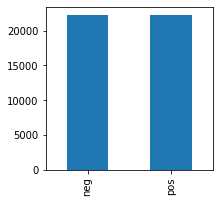

In [ ]:
# Sentimentos (positivo/negativo) dispostos num gráfico
df['sentimento'].value_counts().plot(kind='bar', figsize=(3, 3))

# Análise de N-Gramas

In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

stop_words = nltk.corpus.stopwords.words('portuguese')

# Função que define os N-Gramas para análise e retorna a sua quantidade
def n_gramas(data, ngram, stop_words=None):
    vect = CountVectorizer(ngram_range=ngram, stop_words=stop_words)
    vect.fit(df.texto)
    text_vect = vect.transform(data)
    return text_vect.shape[1]
    
print('Carregando as análises ...')
print('Unigramas COM stopwords: ', n_gramas(df.texto, (1, 1)))
print('Unigramas SEM stopwords: ', n_gramas(df.texto, (1, 1), stop_words))
print('Bigramas COM stopwords: ', n_gramas(df.texto, (2, 2)))
print('Bigramas SEM stopwords: ', n_gramas(df.texto, (2, 2), stop_words))
print('Trigramas COM stopwords: ', n_gramas(df.texto, (3, 3)))
print('Trigramas SEM stopwords: ', n_gramas(df.texto, (3, 3), stop_words))
print('Finalizou!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Carregando as análises ...
Unigramas COM stopwords:  124169
Unigramas SEM stopwords:  123994
Bigramas COM stopwords:  2306574
Bigramas SEM stopwords:  2910091
Trigramas COM stopwords:  5632852
Trigramas SEM stopwords:  4841031
Finalizou!


# Tokenização

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['token'] = df.texto.apply(word_tokenize)
df[['token', 'texto']].head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,token,texto
0,"[Esse, bocejo, de, pia, de, cozinha, de, orçam...",Esse bocejo de pia de cozinha de orçamento mui...
1,"[O, Bravo, parece, indicar, que, o, personagem...",O Bravo parece indicar que o personagem princi...
2,"[Durante, a, Guerra, pela, Independência, do, ...","Durante a Guerra pela Independência do Sul, GE..."
3,"[É, fora, de, questão, que, a, verdadeira, Ann...",É fora de questão que a verdadeira Anna Anders...
4,"[Concordo, totalmente, com, outro, dos, reviso...",Concordo totalmente com outro dos revisores aq...


In [ ]:
# Este passo demora um pouco devido a quantidade de texto ... No meu computador demorou aprox. 12 minutos
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk.tag import pos_tag

df['tags'] = df['token'].apply(pos_tag, tagset='universal')
df['tags'].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


0    [(Esse, NOUN), (bocejo, NOUN), (de, X), (pia, ...
1    [(O, NOUN), (Bravo, NOUN), (parece, NOUN), (in...
2    [(Durante, NOUN), (a, DET), (Guerra, NOUN), (p...
3    [(É, ADJ), (fora, NOUN), (de, ADP), (questão, ...
4    [(Concordo, NOUN), (totalmente, NOUN), (com, N...
Name: tags, dtype: object

In [ ]:
from collections import Counter
counter = Counter()

counter['a'] += 2
counter

counter.update('a')
counter.update('b')
counter

Counter({'a': 3, 'b': 1})

In [ ]:
from collections import Counter

counter = Counter()

for tags in df.tags:
    for word, tag in tags:
        counter[tag] += 1

In [ ]:
counter

Counter({'.': 1292688,
         'ADJ': 1252222,
         'ADP': 355344,
         'ADV': 69917,
         'CONJ': 30425,
         'DET': 288532,
         'NOUN': 5999053,
         'NUM': 55942,
         'PRON': 21642,
         'PRT': 27027,
         'VERB': 768583,
         'X': 915357})

# Iniciando o modelo

### Transformando 'pos' e 'neg' em 1 e 0 respectivamente

In [ ]:
df['sentimento'] = df['sentimento'].map({ 'pos': 1, 'neg': 0 })
df.head()

,codigo,texto,sentimento,token,tags
0,1,Esse bocejo de pia de cozinha de orçamento mui...,0,"[Esse, bocejo, de, pia, de, cozinha, de, orçam...","[(Esse, NOUN), (bocejo, NOUN), (de, X), (pia, ..."
1,2,O Bravo parece indicar que o personagem princi...,0,"[O, Bravo, parece, indicar, que, o, personagem...","[(O, NOUN), (Bravo, NOUN), (parece, NOUN), (in..."
2,3,"Durante a Guerra pela Independência do Sul, GE...",1,"[Durante, a, Guerra, pela, Independência, do, ...","[(Durante, NOUN), (a, DET), (Guerra, NOUN), (p..."
3,4,É fora de questão que a verdadeira Anna Anders...,1,"[É, fora, de, questão, que, a, verdadeira, Ann...","[(É, ADJ), (fora, NOUN), (de, ADP), (questão, ..."
4,5,Concordo totalmente com outro dos revisores aq...,0,"[Concordo, totalmente, com, outro, dos, reviso...","[(Concordo, NOUN), (totalmente, NOUN), (com, N..."


### Vetorização e remoção das StopWords do texto 

In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

stops = nltk.corpus.stopwords.words('portuguese')

vect = CountVectorizer(ngram_range=(1, 1), stop_words=stops) # utilizamos a técnica de unigrama
vect.fit(df.texto)
texto_vect = vect.transform(df.texto)
texto_vect_dl = vect.transform(df.texto)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Treinamento do modelo utilizando 20% para teste e 80% para treino

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    texto_vect,
    df['sentimento'],
    test_size = 0.2,
    random_state = 42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(random_state=0, solver='newton-cg') # 'newton-cg' = Algoritmo a ser usado no problema de otimização
train = train.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score

y_prediction = train.predict(X_test)
f1 = f1_score(y_prediction, y_test, average='weighted')

print('O modelo performou em: ', f1)

O modelo performou em:  0.8788059889465184


Utilizando LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_dl = pd.read_csv('https://dados-ml-pln.s3-sa-east-1.amazonaws.com/reviews-pt-br.csv', encoding='utf-8')

train_data, test_data = train_test_split(df_dl, test_size=0.2,
                                         random_state=42) 
print("Tamanho dos dados de treino:", len(train_data))
print("Tamanho dos dados de teste", len(test_data))

Tamanho dos dados de treino: 35611
Tamanho dos dados de teste 8903


Tokenização dos dados

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.texto)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("tamanho do vocabulario :", vocab_size)

tamanho do vocabulario : 114096


In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.texto),
                        maxlen = 30)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.texto),
                       maxlen = 30)

print("X de treino:",x_train.shape)
print("X de teste:",x_test.shape)

X de treino: (35611, 30)
X de teste: (8903, 30)


In [ ]:
labels = train_data.sentimento.unique().tolist()

Codificando os rotulos para 0 e 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data.sentimento.to_list())

y_train = encoder.transform(train_data.sentimento.to_list())
y_test = encoder.transform(test_data.sentimento.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("Y de treino:", y_train.shape)
print("Y de teste:", y_test.shape)

Y de treino: (35611, 1)
Y de teste: (8903, 1)


Usando Transfer Learning para o treinamento da camada de incorporação

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-12-05 23:15:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-05 23:15:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-05 23:15:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!pwd
!ls
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../best_model.hdf5'

/content
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data


In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
import numpy as np

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
import tensorflow as tf

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=30,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

Estrutura da rede neural

In [ ]:
sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Treinamento do modelo

In [ ]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=110,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/110
35/35 [==============================] - 18s 507ms/step - loss: 0.0981 - accuracy: 0.9619 - val_loss: 1.1897 - val_accuracy: 0.7104 - lr: 0.0010
Epoch 2/110
35/35 [==============================] - 17s 488ms/step - loss: 0.0982 - accuracy: 0.9619 - val_loss: 1.1772 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 3/110
35/35 [==============================] - 17s 498ms/step - loss: 0.1039 - accuracy: 0.9600 - val_loss: 1.1763 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 4/110
35/35 [==============================] - 17s 481ms/step - loss: 0.1062 - accuracy: 0.9590 - val_loss: 1.1995 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 5/110
35/35 [==============================] - 17s 485ms/step - loss: 0.0988 - accuracy: 0.9611 - val_loss: 1.1821 - val_accuracy: 0.7098 - lr: 0.0010
Epoch 6/110
35/35 [==============================] - 18s 506ms/step - loss: 0.0970 - accuracy: 0.9630 - val_loss: 1.1758 - val_accuracy: 0.7055 - lr: 0.0010
Epoch 7/110
35/35 [==============================] - 17s 4

Plotagem dos resultados do modelo

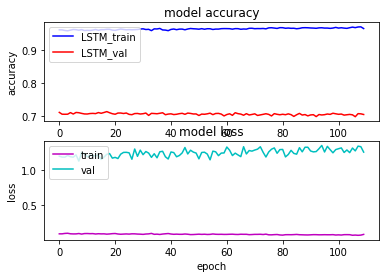

In [ ]:
import matplotlib.pyplot as plt
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')





####**Validação do professor**

Consolidar apenas os scripts do seu **modelo campeão**, desde o carregamento do dataframe, separação das amostras, tratamentos utilizados (funções, limpezas, etc.), criação dos objetos de vetorização dos textos e modelo treinado e outras implementações utilizadas no processo de desenvolvimento do modelo.